# $\text{Exact diagonalization of the } 0 - \pi \text{ qubit Hamiltonian} - E \text{ } vs \text{ } n_{g}$

In [6]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [7]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [8]:
phi_ext_val=np.pi
ng_val=0.5

ng=np.arange(0.495,0.5051,0.005)
print(r"(1%) \epsilon_n = ",0.005)
epsilon_n=0.005
print(ng)

a=np.pi-(np.pi*0.01)
b=np.pi+(np.pi*0.01 + 0.001)
phi_ext=np.arange(a,b,(0.01*np.pi))
print(r"(1%) \epsilon_{\varphi} = ",(0.01*np.pi))
epsilon_phi=(0.01*np.pi)
print(phi_ext)

(1%) \epsilon_n =  0.005
[0.495 0.5   0.505]
(1%) \epsilon_{\varphi} =  0.031415926535897934
[3.11017673 3.14159265 3.17300858]


In [9]:
Energiesng = np.load('Energiesng.npy')
Energies2ng = np.load('Energies2ng.npy')
Energiesphi = np.load('Energiesphi.npy')
Energies2phi = np.load('Energies2phi.npy')

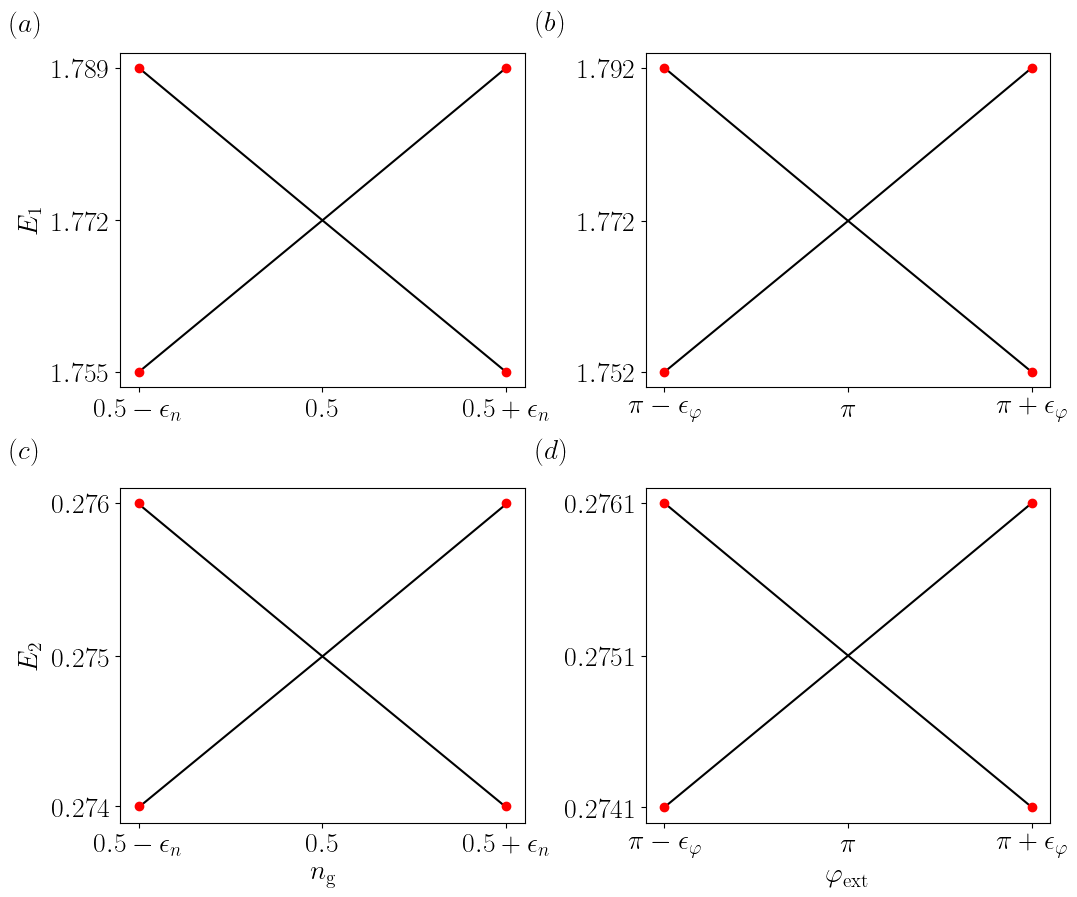

In [21]:
#import matplotlib.pyplot as plt
#import numpy as np

# Create the figure and subplots
fig = plt.figure(figsize=(12, 10))

# Plot 1
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(ng, Energiesng, c="k")
ax1.plot(0.5-epsilon_n,1.7550311282877298, 'ro')
ax1.plot(0.5-epsilon_n,1.7889259142999712, 'ro')
ax1.plot(0.5+epsilon_n,1.7550311282877298, 'ro')
ax1.plot(0.5+epsilon_n,1.7889259142999712, 'ro')
ax1.set_xticks([0.5-epsilon_n,0.500,0.5+epsilon_n])
ax1.set_xticklabels([r"$0.5-\epsilon_n$",r"$0.5$",r"$0.5+\epsilon_n$"])
ax1.set_yticks([1.7550311282877298,1.7719316405392005,1.7889259142999712])
ax1.set_yticklabels([r"$1.755$",r"$1.772$",r"$1.789$"])
#ax1.set_xlabel('$n_g$')
ax1.set_ylabel(r'$E_1$', labelpad=7.0)
ax1.text(0.5-1.7*epsilon_n,1.793,r'$(a)$', fontsize=20)

# Plot 2
ax3 = fig.add_subplot(2, 2, 2)
ax3.plot(phi_ext, Energiesphi, c="k")
ax3.plot(np.pi-epsilon_phi,1.7520692863704903, 'ro')
ax3.plot(np.pi-epsilon_phi,1.7920511441321862, 'ro')
ax3.plot(np.pi+epsilon_phi,1.7520692863701748, 'ro')
ax3.plot(np.pi+epsilon_phi,1.7920511441321134, 'ro')
ax3.set_xticks([np.pi-epsilon_phi,np.pi,np.pi+epsilon_phi])
ax3.set_xticklabels([r"$\pi-\epsilon_{\varphi}$",r"$\pi$",r"$\pi+\epsilon_{\varphi}$"])
ax3.set_yticks([1.752069286370,1.7719316412968,1.7920511441321])
ax3.set_yticklabels([r"$1.752$",r"$1.772$",r"$1.792$"])
#ax3.set_xlabel(r'$\varphi_{ext}$')
#ax3.set_ylabel('$E (1)$', labelpad=7.0)
ax3.text(np.pi-1.7*epsilon_phi,1.797,r'$(b)$', fontsize=20)

# Plot 3
ax2 = fig.add_subplot(2, 2, 3)
ax2.plot(ng, Energies2ng, c="k")
ax2.plot(0.5-epsilon_n,0.2741644560315928, 'ro')
ax2.plot(0.5-epsilon_n,0.2761153906221432, 'ro')
ax2.plot(0.5+epsilon_n,0.2741644560315928, 'ro')
ax2.plot(0.5+epsilon_n,0.2761153906221432, 'ro')
ax2.set_xticks([0.5-epsilon_n,0.500,0.5+epsilon_n])
ax2.set_xticklabels([r"$0.5-\epsilon_n$",r"$0.5$",r"$0.5+\epsilon_n$"])
ax2.set_yticks([0.2741644560315928,0.2751284142050514,0.2761153906221432])
ax2.set_yticklabels([r"$0.274$",r"$0.275$",r"$0.276$"])
ax2.set_xlabel(r'$n_{\rm g}$')
ax2.set_ylabel(r'$E_2$', labelpad=7.0)
ax2.text(0.5-1.7*epsilon_n,0.2764,r'$(c)$', fontsize=20)


# Plot 4
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(phi_ext, Energies2phi, c="k")
ax4.plot(np.pi-epsilon_phi,0.2741627994530662, 'ro')
ax4.plot(np.pi-epsilon_phi,0.27611371990063416, 'ro')
ax4.plot(np.pi+epsilon_phi,0.2741627994530732, 'ro')
ax4.plot(np.pi+epsilon_phi,0.2761137199006254, 'ro')
ax4.set_xticks([np.pi-epsilon_phi,np.pi,np.pi+epsilon_phi])
ax4.set_xticklabels([r"$\pi-\epsilon_{\varphi}$",r"$\pi$",r"$\pi+\epsilon_{\varphi}$"])
ax4.set_yticks([0.2741627994530,0.27513511904323,0.2761137199006])
ax4.set_yticklabels([r"$0.2741$",r"$0.2751$",r"$0.2761$"])
ax4.set_xlabel(r'$\varphi_{\rm ext}$')
#ax4.set_ylabel('$E (2)$', labelpad=7.0)
ax4.text(np.pi-1.7*epsilon_phi,0.2764,r'$(d)$', fontsize=20)


# Adjust the spacing between subplots
#fig.tight_layout()
fig.subplots_adjust(wspace=0.3,hspace=0.3)

# Show the figure
#plt.savefig('Energies_vs_ng&phi_M20N20_INTNO2.png',dpi=300,bbox_inches='tight')
plt.show()


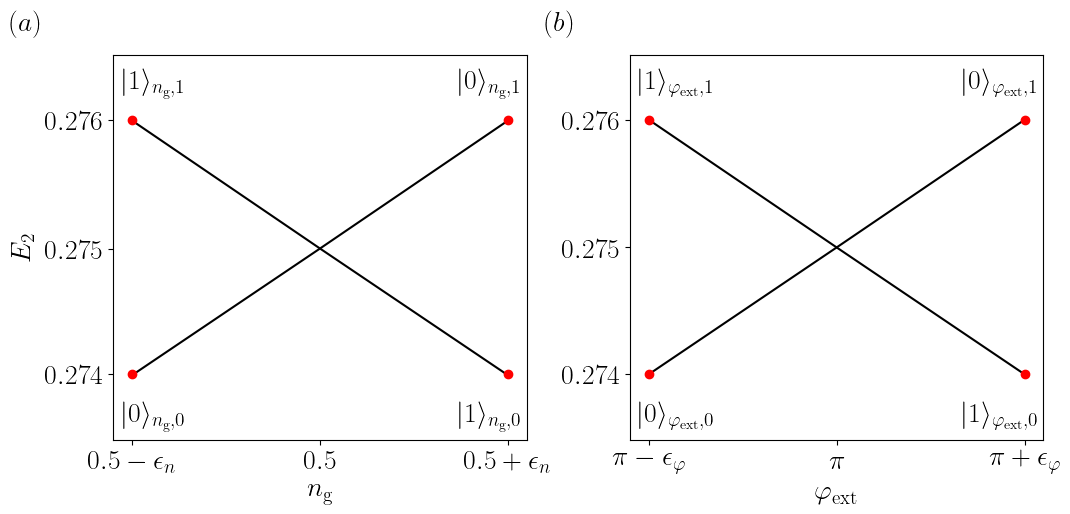

In [77]:
# Create the figure and subplots
fig = plt.figure(figsize=(12, 5))

# Plot 3
ax2 = fig.add_subplot(121)
ax2.plot(ng, Energies2ng, c="k")
ax2.plot(0.5-epsilon_n,0.2741644560315928, 'ro')
ax2.plot(0.5-epsilon_n,0.2761153906221432, 'ro')
ax2.plot(0.5+epsilon_n,0.2741644560315928, 'ro')
ax2.plot(0.5+epsilon_n,0.2761153906221432, 'ro')
ax2.set_xticks([0.5-epsilon_n,0.500,0.5+epsilon_n])
ax2.set_xticklabels([r"$0.5-\epsilon_n$",r"$0.5$",r"$0.5+\epsilon_n$"])
ax2.set_yticks([0.2741644560315928,0.2751284142050514,0.2761153906221432])
ax2.set_yticklabels([r"$0.274$",r"$0.275$",r"$0.276$"])
ax2.set_xlabel(r'$n_{\rm g}$')
ax2.set_ylabel(r'$E_2$', labelpad=7.0)
ax2.set_ylim(0.2741644560315928-0.0005,0.2761153906221432+0.0005)
ax2.text(0.5-1.65*epsilon_n,0.2768,r'$(a)$', fontsize=20)
ax2.text(0.5-1.05*epsilon_n,0.2738,r'$|0\rangle_{n_{\rm g},0}$', fontsize=20)
ax2.text(0.5+0.74*epsilon_n,0.2738,r'$|1\rangle_{n_{\rm g},0}$', fontsize=20)
ax2.text(0.5-1.05*epsilon_n,0.27635,r'$|1\rangle_{n_{\rm g},1}$', fontsize=20)
ax2.text(0.5+0.74*epsilon_n,0.27635,r'$|0\rangle_{n_{\rm g},1}$', fontsize=20)

# Plot 4
ax4 = fig.add_subplot(122)
ax4.plot(phi_ext, Energies2phi, c="k")
ax4.plot(np.pi-epsilon_phi,0.2741627994530662, 'ro')
ax4.plot(np.pi-epsilon_phi,0.27611371990063416, 'ro')
ax4.plot(np.pi+epsilon_phi,0.2741627994530732, 'ro')
ax4.plot(np.pi+epsilon_phi,0.2761137199006254, 'ro')
ax4.set_xticks([np.pi-epsilon_phi,np.pi,np.pi+epsilon_phi])
ax4.set_xticklabels([r"$\pi-\epsilon_{\varphi}$",r"$\pi$",r"$\pi+\epsilon_{\varphi}$"])
ax4.set_yticks([0.2741627994530,0.27513511904323,0.2761137199006])
ax4.set_yticklabels([r"$0.274$",r"$0.275$",r"$0.276$"])
ax4.set_xlabel(r'$\varphi_{\rm ext}$')
ax4.set_ylim(0.2741627994530-0.0005,0.2761137199006+0.0005)
ax4.text(np.pi-1.05*epsilon_phi,0.2738,r'$|0\rangle_{\varphi_{\rm ext},0}$', fontsize=20)
ax4.text(np.pi+0.67*epsilon_phi,0.2738,r'$|1\rangle_{\varphi_{\rm ext},0}$', fontsize=20)
ax4.text(np.pi-1.05*epsilon_phi,0.27635,r'$|1\rangle_{\varphi_{\rm ext},1}$', fontsize=20)
ax4.text(np.pi+0.67*epsilon_phi,0.27635,r'$|0\rangle_{\varphi_{\rm ext},1}$', fontsize=20)
#ax4.set_ylabel('$E (2)$', labelpad=7.0)
ax4.text(np.pi-1.55*epsilon_phi,0.2768,r'$(b)$', fontsize=20)

# Adjust the spacing between subplots
#fig.tight_layout()
fig.subplots_adjust(wspace=0.25)

# Show the figure
#plt.savefig('Energies2_vs_ng&phi_M20N50_INTNO2.png',dpi=300,bbox_inches='tight')
plt.show()
